In [1]:
from datetime import datetime

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL.ImageOps import scale
from zmq.backend import second


In [2]:
# Load the data
links = pd.read_csv("./wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/links.tsv", sep="\t", skiprows= 11, names = ["source", "target"])



In [3]:
# create a directed graph
graph = nx.from_pandas_edgelist(links, source="source", target="target", create_using=nx.DiGraph)
page_rank = nx.pagerank(graph)

In [4]:
finished_paths = pd.read_csv("./clean_finished_paths.csv", sep=",")
# add column of ranks to the finished paths for each path
finished_paths["path"] = finished_paths["path"].apply(lambda x: [p[1:-1] for p in x[1:-1].replace(" ", "").split(",")])
finished_paths.head()
#remove backpaths
def remove_backpaths(path):
    new_path = []
    # reverse the path
    path = path[::-1]
    counter = 0
    for page in path:
        if page == "<":
            counter += 1
            continue
        if counter > 0:
            counter -= 1
            continue
        new_path.append(page)
    return new_path[::-1]
finished_paths["clean_path"] = finished_paths["path"].apply(remove_backpaths)
finished_paths.head(80)

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac..."
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_..."
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,..."
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr..."
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,12470aee3d5ad152,2012-08-05 17:08:48,23,"[2005_Atlantic_hurricane_season, Cape_Verde, P...",-1,3,0,3,2005_Atlantic_hurricane_season,Lisbon,"['Geography', 'Storms']","['Geography', 'European_Geography']",Geography,Geography,"[2005_Atlantic_hurricane_season, Cape_Verde, P..."
76,1d7fe6405a2f92a1,2009-11-16 23:51:02,136,"[2005_Atlantic_hurricane_season, International...",2,5,0,5,2005_Atlantic_hurricane_season,William_McKinley,"['Geography', 'Storms']","['People', 'USA_Presidents']",Geography,People,"[2005_Atlantic_hurricane_season, International..."
77,566cf09824091017,2012-08-02 08:43:28,65,"[2005_Atlantic_hurricane_season, United_States...",-1,3,0,3,2005_Atlantic_hurricane_season,William_McKinley,"['Geography', 'Storms']","['People', 'USA_Presidents']",Geography,People,"[2005_Atlantic_hurricane_season, United_States..."
78,05a8d2911e44275a,2013-06-21 03:20:29,111,"[2005_Atlantic_hurricane_season, George_W._Bus...",-1,3,0,3,2005_Atlantic_hurricane_season,William_McKinley,"['Geography', 'Storms']","['People', 'USA_Presidents']",Geography,People,"[2005_Atlantic_hurricane_season, George_W._Bus..."


In [5]:
# add column of ranks to the finished paths for each path
finished_paths["ranks"] = finished_paths["clean_path"].apply(lambda x: [page_rank.get(page,-1) for page in x])
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac...","[0.000595641037442582, 0.0009319474059595194, ..."
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.000595641037442582, 0.006339517036740152, 0..."
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,...","[0.000595641037442582, 0.00037553623914707735,..."
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0..."
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70855,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",-1,2,0,2,Yagan,Civilization,"['People', 'Historical_figures']","['Citizenship', 'Culture_and_Diversity']",People,Citizenship,"[Yagan, Ancient_Egypt, Civilization]","[3.714962213413337e-05, 0.0010641050499469898,..."
70856,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3,8,1,6,Yagan,Fiction,"['People', 'Historical_figures']","['Language_and_literature', 'Literature_types']",People,Language_and_literature,"[Yagan, Folklore, 19th_century, Charles_Dicken...","[3.714962213413337e-05, 0.00034700374638433864..."
70857,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",-1,6,0,6,Yagan,U.S._Open_%28tennis%29,"['People', 'Historical_figures']","['Everyday_life', 'Sports_events']",People,Everyday_life,"[Yagan, Australia, England, France, United_Sta...","[3.714962213413337e-05, 0.003204271399017423, ..."
70858,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1,3,0,3,Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,"['Geography', 'Geography_of_Oceania_Australasia']","['People', 'USA_Presidents']",Geography,People,"[Yarralumla%2C_Australian_Capital_Territory, A...","[3.6708860049547024e-05, 0.003204271399017423,..."


In [6]:
def get_hub(path, ranks):
    return path[np.argmax(ranks)]

finished_paths["hub"] = finished_paths.apply(lambda x: get_hub(x["clean_path"], x["ranks"]), axis=1)
        
finished_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks,hub
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac...","[0.000595641037442582, 0.0009319474059595194, ...",Africa
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.000595641037442582, 0.006339517036740152, 0...",Europe
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,...","[0.000595641037442582, 0.00037553623914707735,...",Africa
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece


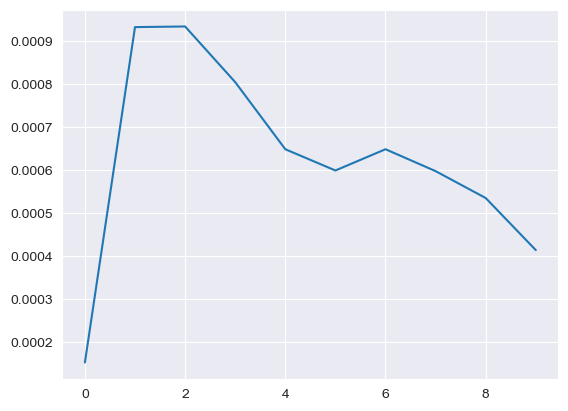

In [7]:
paths_to_plot = finished_paths[finished_paths["path_length"] == 10]["ranks"]
means = []
for i in range(10):
    means.append(np.median([path[i] for path in paths_to_plot]))
plt.plot(means)
plt.show()



In [19]:
# divide the periods into 3 months
from datetime import datetime
import ast
categories = pd.read_csv("./clean_categories.csv")
categories["article"] = categories["article"].apply(lambda x: x)
categories["category"] = categories["category"].apply(lambda x: ast.literal_eval(x))
categories_dict = {}
for index, row in categories.iterrows():
    categories_dict[row["article"]] = row["category"]

finished_paths["hub_categories"] = finished_paths["hub"].apply(lambda x: categories_dict.get(x, "None"))
finished_paths["hub_general_category"] = finished_paths["hub_categories"].apply(lambda x: x[0])
finished_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks,hub,hub_categories,hub_general_category
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac...","[0.000595641037442582, 0.0009319474059595194, ...",Africa,"[Geography, African_Geography]",Geography
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.000595641037442582, 0.006339517036740152, 0...",Europe,"[Geography, European_Geography]",Geography
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,...","[0.000595641037442582, 0.00037553623914707735,...",Africa,"[Geography, African_Geography]",Geography
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece,"[Geography, European_Geography, European_Count...",Geography
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece,"[Geography, European_Geography, European_Count...",Geography


In [67]:
# divide the periods into 3 months
from datetime import datetime
finished_paths["seconds"] = finished_paths["timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp())
period = finished_paths["seconds"].max() - finished_paths["seconds"].min()
nb_divisions = 32
division = period / nb_divisions
#sort data by timestamp
min = finished_paths["seconds"].min()
finished_paths = finished_paths.sort_values("seconds")
finished_paths["period"] = (finished_paths["seconds"] - min) // division
#for i in range(nb_divisions):
#    hubs_count = finished_paths[finished_paths["period"] == i]["hub_category"].value_counts()
#    #plot the hubs
#    plt.bar(hubs_count.index, hubs_count.values)
#    plt.xticks(rotation=90)
#    plt.show()

In [76]:
%matplotlib notebook
target_science = finished_paths
visited_categories_per_period = []
for i in range(nb_divisions):
    visited_categories = {}
    #print("period of time: ", datetime.fromtimestamp(min + i * division), " to ", datetime.fromtimestamp(min + (i + 1) * division))
    for index, row in target_science[target_science["period"] == i].iterrows():
        for article in row["clean_path"][1:]:
            category = categories_dict.get(article, "None")
            if category == ['People', 'Political_People']:
                if article not in visited_categories:
                    visited_categories[article] = 0
                visited_categories[article] += 1
    visited_categories_per_period.append(visited_categories)



In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from datetime import datetime

# Initial data
data = visited_categories_per_period[0]
categories = list(data.keys())
values = list(data.values())

# Create the initial bar plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35, top=0.95)  # Adjust the top and bottom space
bars = sns.barplot(x=categories, y=values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min)) + " to " + str(datetime.fromtimestamp(min + division)), fontsize=10, y=0.98)

# Slider axis
axperiod = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')  # Adjust the position of the slider
speriod = Slider(axperiod, 'Period', 0, nb_divisions - 1, valinit=0, valstep=1)

def update(val):
    period = int(speriod.val)
    data = visited_categories_per_period[period]
    categories = list(data.keys())
    values = list(data.values())
    categories = categories[:20]
    values = values[:20]
    #sort the categories by values
    categories = [x for _, x in sorted(zip(values, categories), reverse=True)]
    values = sorted(values, reverse=True)

    # Clear the current plot
    ax.clear()

    # Create the updated bar plot
    sns.barplot(x=categories, y=values, ax=ax)
    # put the title in the top of the plot
    fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min + period * division)) + " to " + str(datetime.fromtimestamp(min + (period + 1) * division)), fontsize=10, y=0.98)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    fig.canvas.draw_idle()

speriod.on_changed(update)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\hasse\AppData\Local\Temp\ipykernel_12316\535733556.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


In [62]:
%matplotlib notebook
target_science = finished_paths[finished_paths["target_general_category"] == "Everyday_life"]
visited_hubs_per_period = []
for i in range(nb_divisions):
    visited_hubs = {}
    #print("period of time: ", datetime.fromtimestamp(min + i * division), " to ", datetime.fromtimestamp(min + (i + 1) * division))
    for index, row in target_science[target_science["period"] == i].iterrows():
        hub_category = row["hub"]
        if hub_category not in visited_hubs:
            visited_hubs[hub_category] = 0
        visited_hubs[hub_category] += 1
    visited_hubs_per_period.append(visited_hubs)



In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from datetime import datetime

# Initial data
data = visited_hubs_per_period[0]
categories = list(data.keys())
values = list(data.values())

# Create the initial bar plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35, top=0.95)  # Adjust the top and bottom space
bars = sns.barplot(x=categories, y=values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min)) + " to " + str(datetime.fromtimestamp(min + division)), fontsize=10, y=0.98)

# Slider axis
axperiod = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')  # Adjust the position of the slider
speriod = Slider(axperiod, 'Period', 0, nb_divisions - 1, valinit=0, valstep=1)

def update(val):
    period = int(speriod.val)
    data = visited_hubs_per_period[period]
    categories = list(data.keys())
    values = list(data.values())
    #sort the categories by values
    categories = [x for _, x in sorted(zip(values, categories), reverse=True)]
    values = sorted(values, reverse=True)
    categories = categories[:20]
    values = values[:20]

    # Clear the current plot
    ax.clear()

    # Create the updated bar plot
    sns.barplot(x=categories, y=values, ax=ax)
    # put the title in the top of the plot
    fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min + period * division)) + " to " + str(datetime.fromtimestamp(min + (period + 1) * division)), fontsize=10, y=0.98)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    fig.canvas.draw_idle()

speriod.on_changed(update)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\hasse\AppData\Local\Temp\ipykernel_12316\3977941240.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
